# Sharp Ratio & Frontier

In [1]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from datetime import date

%matplotlib inline

ds_yahoo = 'yahoo'

last_year = datetime.datetime.now().year - 1
#start = datetime.datetime.now().replace(year=last_year)
start = date(date.today().year, 1, 1)
end = datetime.datetime.now()

## Portfolio Atual

### Pegando os dados na API do Yahoo

In [2]:
tickers = ['JNJ','AMZN','M','LB','ROST','V','GOOGL','MSFT','IHI','VGT','NOBL','ARKW']

jnj = web.DataReader(tickers[0], ds_yahoo, start, end)
amzn = web.DataReader(tickers[1], ds_yahoo, start, end)
m = web.DataReader(tickers[2], ds_yahoo, start, end)
lb = web.DataReader(tickers[3], ds_yahoo, start, end)
rost = web.DataReader(tickers[4], ds_yahoo, start, end)
v = web.DataReader(tickers[5], ds_yahoo, start, end)
googl = web.DataReader(tickers[6], ds_yahoo, start, end)
msft = web.DataReader(tickers[7], ds_yahoo, start, end)
ihi = web.DataReader(tickers[8], ds_yahoo, start, end)
vgt = web.DataReader(tickers[9], ds_yahoo, start, end)
nobl = web.DataReader(tickers[10], ds_yahoo, start, end)
arkw = web.DataReader(tickers[11], ds_yahoo, start, end)

## Normalizando o retorno diário de cada ativo do portfólio

In [3]:
for acao_df in (jnj, amzn, m, lb, rost, v, googl, msft, ihi, vgt, nobl, arkw):
    acao_df['Retorno Normalizado'] = acao_df['Adj Close'] / acao_df.iloc[0]['Adj Close']

## Alocando cada ativo com um peso específico

In [4]:
pesos = [.737, .672, .188, .255, .346, .922, .342, .950, .941, 2.405, 1.587, .654]

for acao_df, alocacao in zip((jnj,amzn,m,lb,rost,v,googl,msft,ihi,vgt,nobl,arkw), pesos):
    acao_df['Alocacao'] = acao_df['Retorno Normalizado'] * alocacao

## Posição de cada ativo no portfólio

In [5]:
for acao_df in jnj, amzn, m, lb, rost, v, googl, msft, ihi, vgt, nobl, arkw:
    acao_df['Posicao'] = acao_df['Alocacao'] * 10000

In [6]:
todas_posicoes = jnj['Posicao'],amzn['Posicao'],m['Posicao'],lb['Posicao'],rost['Posicao'],v['Posicao'],googl['Posicao'],msft['Posicao'],ihi['Posicao'],vgt['Posicao'],nobl['Posicao'],arkw['Posicao']

# DF que terá colunas adicionadas como Total e Retorno Diário
portfolio_posicao = pd.concat(todas_posicoes, axis=1)

# DF que terá apenas as ações com o Adj Close column
portfolio_acoes = pd.concat(todas_posicoes, axis=1)

In [7]:
portfolio_posicao.columns = ['jnj','amzn','m','lb','rost','v','googl','msft','ihi','vgt','nobl','arkw']
portfolio_acoes.columns = ['jnj','amzn','m','lb','rost','v','googl','msft','ihi','vgt','nobl','arkw']

## Desempenho da carteira

In [8]:
portfolio_posicao['Total'] = portfolio_posicao.sum(axis=1)

In [9]:
print('Investimento inicial:')
print(portfolio_posicao['Total'][0])
print('Investimento final:')
print(round(portfolio_posicao['Total'][-1], 2))

Investimento inicial:
99990.0
Investimento final:
75732.57


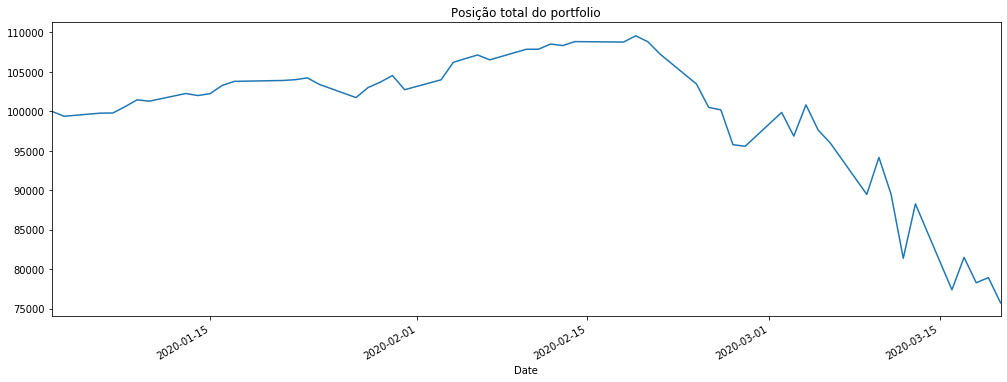

In [10]:
portfolio_posicao['Total'].plot(figsize=(17,6))
plt.title('Posição total do portfolio');

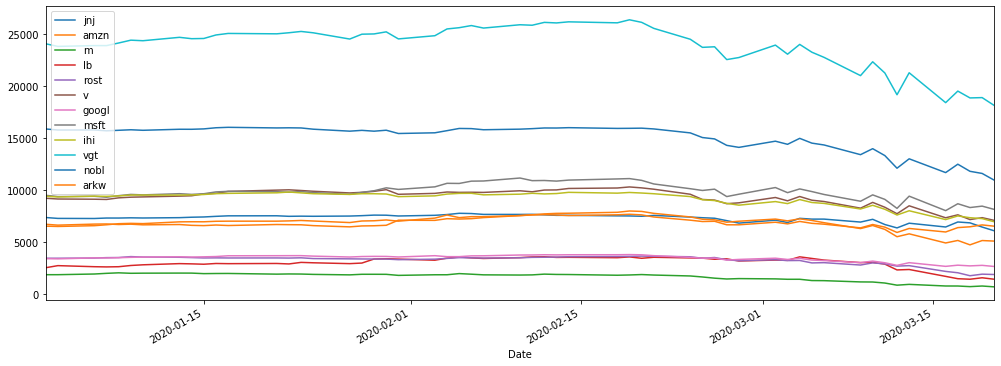

In [11]:
portfolio_acoes.plot(figsize=(17,6));

## Desempenho da Carteira Normalizada

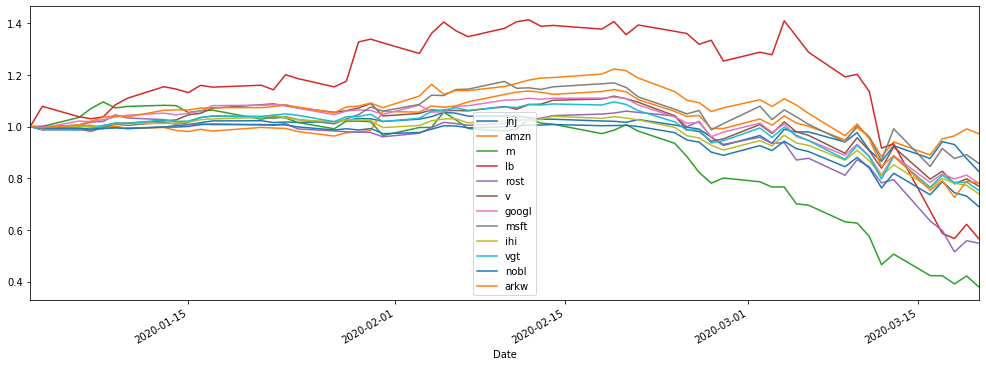

In [12]:
portfolio_normalizado = portfolio_acoes / portfolio_acoes.iloc[0]
portfolio_normalizado.plot(figsize=(17,6));

## Desempenho em % de cada ativo

In [36]:
desempenho = (portfolio_acoes.iloc[-1] - portfolio_acoes.iloc[0]) / portfolio_acoes.iloc[0]
desempenho = round(desempenho * 100, 2)
desempenho.sort_values()

m       -62.05
rost    -45.14
lb      -43.39
nobl    -30.99
ihi     -26.02
vgt     -24.65
v       -23.06
googl   -21.95
arkw    -21.92
jnj     -17.34
msft    -14.25
amzn     -2.74
dtype: float64

## Retorno diário da carteira

In [13]:
portfolio_posicao['Retorno Diario'] = portfolio_posicao['Total'].pct_change(1)

In [14]:
# Média de retorno diário
round_ret_medio_diario = round(portfolio_posicao['Retorno Diario'].mean() * 100, 2)
print('Essa carteira rende em média {}% diariamente'.format(round_ret_medio_diario))

Essa carteira rende em média -0.46% diariamente


In [15]:
# Desvio Padrão do retorno diário
portfolio_posicao['Retorno Diario'].std()

0.03300056046645871

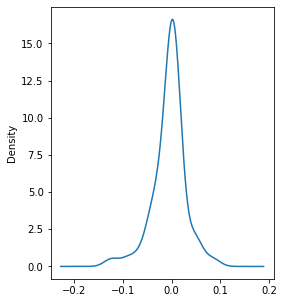

In [16]:
# Gráfico de densidade
portfolio_posicao['Retorno Diario'].plot(kind='kde', figsize=(4,5));

## Retorno Total da Carteira

In [17]:
retorno_total_acumulado = 100 * (portfolio_posicao['Total'][-1] / portfolio_posicao['Total'][0] - 1)
round_ret = round(retorno_total_acumulado, 3)
print('Essa carteira rendeu {} %'.format(round_ret))

Essa carteira rendeu -24.26 %


In [18]:
sharpe_ratio = (portfolio_posicao['Retorno Diario'].mean()) / portfolio_posicao['Retorno Diario'].std()
sharpe_ratio

-0.1389135701852489

In [19]:
sharpe_ratio_ano = (245 ** 0.5) * sharpe_ratio
sharpe_ratio_ano

-2.1743413015198323

## Retorno diário

In [20]:
retorno_diario = portfolio_acoes.pct_change(1)

## Gerando um único portfólio com posição atual

In [21]:
print(portfolio_acoes.columns)

# Gerando pesos aleatórios
print("Pesos Atuais")
print(pesos)

print("Rebalancear os pesos")
pesos = pesos / np.sum(pesos)
print(pesos)

# Retorno esperado
print("Retorno esperado")
ret_esp = np.sum( (retorno_diario.mean() * pesos) * 245 )
print(ret_esp)

# Volatilidade esperada
print("Volatilidade esperada")
vol_esp = np.sqrt( np.dot( pesos.T, np.dot( retorno_diario.cov() * 245, pesos ) ) )
print(vol_esp)

# Taxa de Sharpe
print("Sharpe Ratio")
sharpe = (ret_esp - 0.065) / vol_esp
print(sharpe)


Index(['jnj', 'amzn', 'm', 'lb', 'rost', 'v', 'googl', 'msft', 'ihi', 'vgt',
       'nobl', 'arkw'],
      dtype='object')
Pesos Atuais
[0.737, 0.672, 0.188, 0.255, 0.346, 0.922, 0.342, 0.95, 0.941, 2.405, 1.587, 0.654]
Rebalancear os pesos
[0.07370737 0.06720672 0.01880188 0.02550255 0.03460346 0.09220922
 0.03420342 0.0950095  0.09410941 0.24052405 0.15871587 0.06540654]
Retorno esperado
-1.1375823446010491
Volatilidade esperada
0.5167206472302446
Sharpe Ratio
-2.3273355749324116


## Gerando milhares de portfólios

In [22]:
num_portfolios = 1000
pesos_arr = np.zeros((num_portfolios, len(portfolio_acoes.columns)))
ret_esp_arr = np.zeros(num_portfolios)
vol_esp_arr = np.zeros(num_portfolios)
sharpe_arr = np.zeros(num_portfolios)

for ind in range(num_portfolios):

    # Pesos aleatórios
    pesos = np.array(np.random.random(len(tickers)))
    pesos = pesos / np.sum(pesos)
    pesos_arr[ind,:] = pesos

    # Retorno esperado
    ret_esp_arr[ind] = np.sum( (retorno_diario.mean() * pesos) * 245 )

    # Volatilidade esperada
    vol_esp_arr[ind] = np.sqrt( np.dot( pesos.T, np.dot( retorno_diario.cov() * 245, pesos ) ) )

    # Taxa de Sharpe
    sharpe_arr[ind] = (ret_esp_arr[ind] - 0.065) / vol_esp_arr[ind]

pesos_arr[sharpe_arr.argmax(),:]

array([0.10006868, 0.09945915, 0.00448421, 0.025473  , 0.00364318,
       0.19799462, 0.02320682, 0.17786665, 0.03710376, 0.1735632 ,
       0.04737229, 0.10976445])

In [23]:
sharpe_arr.max()

-1.7814477178563453

In [24]:
sharpe_arr.argmax()

63

In [25]:
pesos_arr[sharpe_arr.argmax(),:]

array([0.10006868, 0.09945915, 0.00448421, 0.025473  , 0.00364318,
       0.19799462, 0.02320682, 0.17786665, 0.03710376, 0.1735632 ,
       0.04737229, 0.10976445])

### Gerando CSV

In [26]:
itau.to_csv('csv/ITUB4.csv')
abev.to_csv('csv/ABEV3.csv')
usim.to_csv('csv/USIM5.csv')
pmam.to_csv('csv/PMAM3.csv')
flry.to_csv('csv/FLRY3.csv')
pssa.to_csv('csv/PSSA3.csv')
tiet.to_csv('csv/TIET4.csv')

NameError: name 'itau' is not defined